In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
from keras.datasets import cifar10
from keras.datasets import cifar100
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import regularizers
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

169009152/169001437 [==============================] - 2s 0us/step
(50000, 32, 32, 3) uint8
(50000, 1) int64
(10000, 32, 32, 3) uint8
(10000, 1) int64


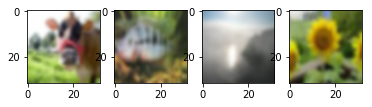

(50000, 32, 32, 3) float32


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [3]:
(X_train, y_train0), (X_test, y_test0) = cifar100.load_data()
print(X_train.shape, X_train.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test.shape, X_test.dtype)
print(y_test0.shape, y_test0.dtype)

# 데이터 확인 / interpolation = "bicubic" -> 인접한 16개 화소의 화소값과 거리에 따른 가중치의 곱을 사용
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()


# 자료형 변환 및 스케일링

X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

print(X_train.shape, X_train.dtype)

# one - hot - encoding
Y_train = np_utils.to_categorical(y_train0, 100)
Y_test = np_utils.to_categorical(y_test0, 100)
Y_train[:4]

In [4]:
np.random.seed(0)

model = Sequential()

model.add(Conv2D(128,(3,3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.1))

model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), activation='relu', padding='same'))
model.add(Conv2D(512,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
__________

In [6]:
hist = model.fit(X_train, Y_train, epochs=50, batch_size=128, validation_data=(X_test, Y_test), verbose=1)

print("Test ACCURACY : %.4f" % (model.evaluate(X_test, Y_test)[1]))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 339us/step - loss: 4.3833 - acc: 0.0307 - val_loss: 4.0075 - val_acc: 0.0793
Epoch 2/50
50000/50000 [==============================] - 16s 326us/step - loss: 4.0006 - acc: 0.0728 - val_loss: 3.7240 - val_acc: 0.1251
Epoch 3/50
50000/50000 [==============================] - 16s 327us/step - loss: 3.7568 - acc: 0.1090 - val_loss: 3.4407 - val_acc: 0.1731
Epoch 4/50
50000/50000 [==============================] - 16s 326us/step - loss: 3.5705 - acc: 0.1434 - val_loss: 3.2495 - val_acc: 0.2137
Epoch 5/50
50000/50000 [==============================] - 16s 326us/step - loss: 3.4151 - acc: 0.1706 - val_loss: 3.0834 - val_acc: 0.2435
Epoch 6/50
50000/50000 [==============================] - 16s 325us/step - loss: 3.2849 - acc: 0.1933 - val_loss: 2.9951 - val_acc: 0.2650
Epoch 7/50
50000/50000 [==============================] - 16s 325us/step - loss: 3.1648 - acc: 0.2156 - val_loss: 2.

In [7]:
print("Test ACCURACY : %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 2s 168us/step
Test ACCURACY : 0.5080


In [8]:
# 테스트 셋의 오차
y_vloss = hist.history['val_loss']

# 학습셋의 오차
y_loss = hist.history['loss']

# 테스트 셋의 정확도
y_vacc = hist.history['val_acc']
# 학습셋의 정확도
y_acc = hist.history['acc']


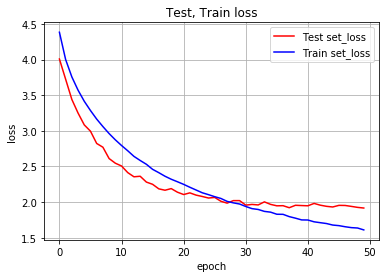

In [9]:
# 학습셋 테스트셋 오차율 그래프
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, c='red', label  = 'Test set_loss')
plt.plot(x_len, y_loss, c='blue', label  = 'Train set_loss')

plt.title('Test, Train loss')
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

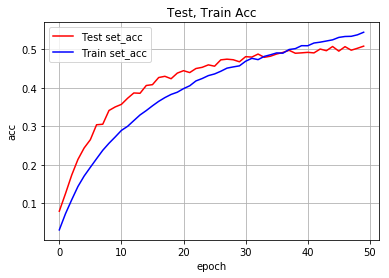

In [11]:
# 학습셋 테스트셋 정확도 그래프
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vacc, c='red', label  = 'Test set_acc')
plt.plot(x_len, y_acc, c='blue', label  = 'Train set_acc')

plt.title('Test, Train Acc')
plt.legend(loc = 'upper left')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()


In [ ]:
#데이터 사이언스스쿨
# https://datascienceschool.net/view-notebook/8fc58d2c1ffc420dac44eafee7b28cea/
# 앤드류 박사
# https://andrewkruger.github.io/projects/2017-08-05-keras-convolutional-neural-network-for-cifar-100